In [1]:
# Import the required packages

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt

In [3]:
# Import data
train_path = '/Users/ryanhuang/Desktop/107-2/statistical learning/Assignments/Assign2/qonly/df1_train.csv'
y_test_path = '/Users/ryanhuang/Desktop/107-2/statistical learning/Assignments/Assign2/qonly/df1_test1y.csv'
x_test_path = '/Users/ryanhuang/Desktop/107-2/statistical learning/Assignments/Assign2/qonly/df1_test1.csv'

train = pd.read_csv(train_path).astype('float64')
x_train_keep = train.iloc[:,1:]
x_test_keep = pd.read_csv(x_test_path)

In [4]:
# Y Preprocessing
y_train_keep = train.iloc[:,0]
y_train_demean = y_train_keep - y_train_keep.mean()
y_test_keep = pd.read_csv(y_test_path).astype('float64')

In [5]:
# X Preprocessing
def is_binary(series, allow_na=False):
    if allow_na:
        series.dropna(inplace=True)
    return sorted(series.unique()) == [0, 1]


def std_feature(dataframe, dataframe_applied, std_on):
    a = dataframe_applied.copy()
    for i in range(dataframe.shape[1]):
        if is_binary(dataframe.iloc[:,i]):
            if 'bin' in std_on:
                a.iloc[:, i] = (dataframe_applied.iloc[:, i] - dataframe.iloc[:, i].mean()) / dataframe.iloc[:, i].std()
            else:
                pass
        else:
            if 'cont' in std_on:
                a.iloc[:, i] = (dataframe_applied.iloc[:, i] - dataframe.iloc[:, i].mean()) / dataframe.iloc[:, i].std()
            else:
                pass
    return a

x_train_std_cont = std_feature(x_train_keep,x_train_keep, std_on=['cont'])
x_train_std_bin = std_feature(x_train_keep,x_train_keep, std_on=['bin'])
x_train_std_all = std_feature(x_train_keep,x_train_keep, std_on=['cont','bin'])

x_test_std_cont = std_feature(x_train_keep,x_test_keep, std_on=['cont'])
x_test_std_bin = std_feature(x_train_keep,x_test_keep, std_on=['bin'])
x_test_std_all = std_feature(x_train_keep,x_test_keep, std_on=['cont','bin'])

In [6]:
# Q1: Conduct exploratory analysis on this dataset.

In [7]:
cont = []
bin = []
for i in range(train.shape[1]):
    if is_binary(train.iloc[:,i]):
        bin.append(i)
    else:
        cont.append(i)
# Summary statistics
train.describe()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
count,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,810.340000,122890.625000,0.260000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000,0.037500,...,0.022500,0.030000,0.032500,0.022500,0.062500,0.150000,0.092500,0.055000,0.102500,0.02500
std,899.037251,16280.121461,0.439184,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248,0.190221,...,0.148489,0.170801,0.177546,0.148489,0.242365,0.357519,0.290093,0.228266,0.303685,0.15632
min,17.000000,81370.000000,0.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,335.000000,112676.000000,0.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,554.500000,128816.000000,0.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,955.500000,136393.000000,1.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,11328.000000,139441.000000,1.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


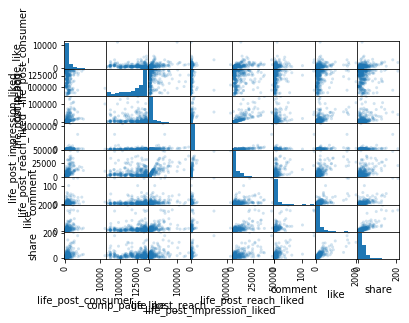

In [8]:
# For continuous Xs and Y, use scatter plot matrix
pd.plotting.scatter_matrix(train.iloc[:,cont], alpha = 0.2, diagonal = 'hist')
plt.show()

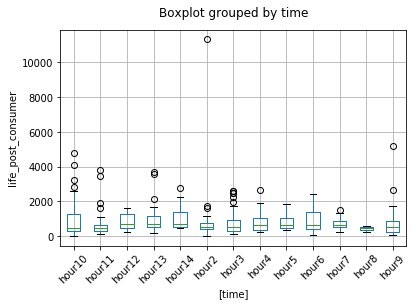

/Users/ryanhuang/.conda/envs/untitled/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


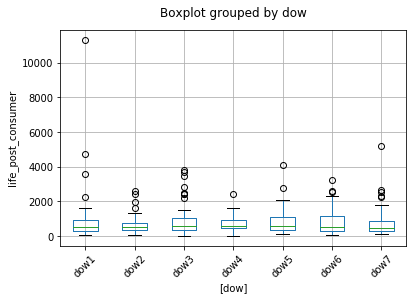

/Users/ryanhuang/.conda/envs/untitled/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


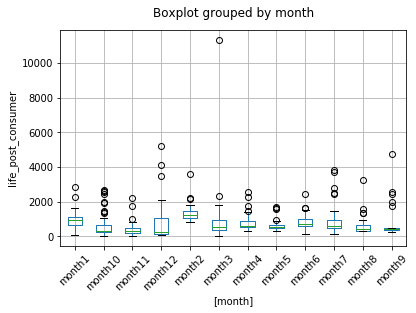

/Users/ryanhuang/.conda/envs/untitled/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


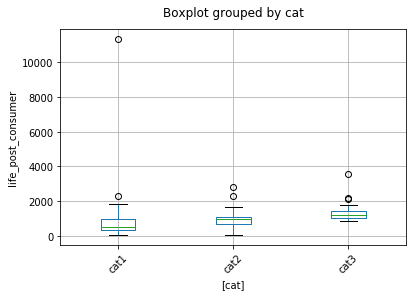

/Users/ryanhuang/.conda/envs/untitled/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


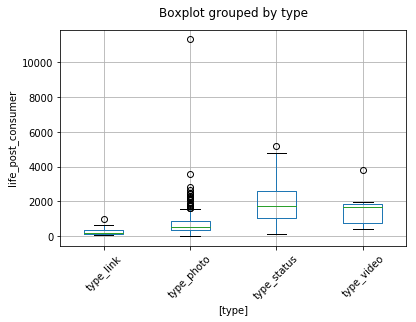

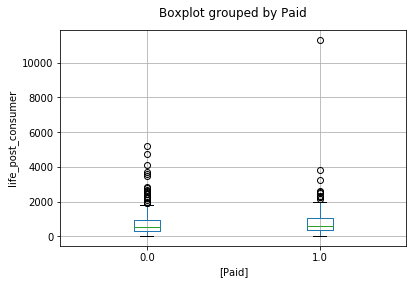

In [9]:
# For binary Xs, use boxplots
# boxplot on hour2~hour14
hour = train.iloc[:,[0]+bin[-13:]].reset_index().melt(
                id_vars=['index',"life_post_consumer"],   #要保留的主字段
                var_name="time",                     #拉長的分類
                value_name="value")
boxplot_hour = hour.loc[hour['value']>0,['life_post_consumer','time']].boxplot(by='time',rot=45)
plt.ylabel('life_post_consumer')
plt.title('')
plt.show()

# boxplot on dow
dow = train.iloc[:,[0]+bin[-19:-13]]
dow['dow7'] = train.iloc[:,bin[-19:-13]].apply(lambda col: 1 if col.sum() == 0 else 0, axis=1)
dow = dow.reset_index().melt(
            id_vars=['index',"life_post_consumer"],   #要保留的主字段
            var_name="dow",                     #拉長的分類
            value_name="value")
boxplot_dow = dow.loc[dow['value']>0,['life_post_consumer','dow']].boxplot(by='dow',rot=45)
plt.ylabel('life_post_consumer')
plt.title('')
plt.show()

# boxplot on month
month = train.iloc[:,[0]+bin[6:17]]
month['month12'] = train.iloc[:,bin[6:17]].apply(lambda col: 1 if col.sum() == 0 else 0, axis=1)
month = month.reset_index().melt(
            id_vars=['index',"life_post_consumer"],   #要保留的主字段
            var_name="month",                     #拉長的分類
            value_name="value")
boxplot_month = month.loc[month['value']>0,['life_post_consumer','month']].boxplot(by='month',rot=45)
plt.ylabel('life_post_consumer')
plt.title('')
plt.show()
# boxplot on cat
cat = train.iloc[:,[0]+bin[4:6]]
cat['cat1'] = train.iloc[:,bin[4:6]].apply(lambda col: 1 if col.sum() == 0 else 0, axis=1)
cat = cat.reset_index().melt(
            id_vars=['index',"life_post_consumer"],   #要保留的主字段
            var_name="cat",                     #拉長的分類
            value_name="value")
boxplot_cat = cat.loc[month['value']>0,['life_post_consumer','cat']].boxplot(by='cat',rot=45)
plt.ylabel('life_post_consumer')
plt.title('')
plt.show()

# boxplot on type
type = train.iloc[:,[0]+bin[1:4]]
type['type_photo'] = train.iloc[:,bin[1:4]].apply(lambda col: 1 if col.sum() == 0 else 0, axis=1)
type = type.reset_index().melt(
            id_vars=['index',"life_post_consumer"],   #要保留的主字段
            var_name="type",                     #拉長的分類
            value_name="value")
boxplot_type = type.loc[type['value']>0,['life_post_consumer','type']].boxplot(by='type',rot=45)
plt.ylabel('life_post_consumer')
plt.title('')
plt.show()

# boxplot on paid
paid = train.iloc[:,[0]+[bin[0]]]
boxplot_paid = paid.boxplot(by='Paid')
plt.ylabel('life_post_consumer')
plt.title('')
plt.show()

In [10]:
# Start comparing the 9 cases

In [11]:
# Defined RMSE function
def RMSE(predict_value, actual_value):
    return np.sqrt(metrics.mean_squared_error(actual_value,predict_value))

In [12]:
# Question 2
q2_pred_y = np.asarray([y_train_keep.mean()] * len(y_test_keep))
q2_rmse = RMSE(q2_pred_y, y_test_keep)
print('q2 best RMSE =', q2_rmse, '\nfirst 20 pred y =',q2_pred_y[:20], '\nfirst 20 actual y =', np.asarray(y_test_keep[:20]).T[0])

q2 best RMSE = 928.8095109332162 
first 20 pred y = [810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34
 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34] 
first 20 actual y = [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


In [13]:
# Question 3
q3_reg = linear_model.LinearRegression().fit(x_train_keep, y_train_keep)
q3_pred_y = q3_reg.predict(x_test_keep)
q3_rmse = RMSE(q3_pred_y, y_test_keep)
print('q3 best RMSE =', q3_rmse, '\nfirst 20 pred y =',q3_pred_y[:20], '\nfirst 20 actual y =', np.asarray(y_test_keep[:20]).T[0])

q3 best RMSE = 692.2891271362014 
first 20 pred y = [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071218 4288.223081  ] 
first 20 actual y = [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


In [14]:
# Question 4
q4_reg = linear_model.LinearRegression().fit(x_train_keep, y_train_demean)
q4_pred_y = q4_reg.predict(x_test_keep) + y_train_keep.mean()
q4_rmse = RMSE(q4_pred_y, y_test_keep)
print('q4 best RMSE =', q4_rmse, '\nfirst 20 pred y =',q4_pred_y[:20], '\nfirst 20 actual y =', np.asarray(y_test_keep[:20]).T[0])

q4 best RMSE = 692.2891271361826 
first 20 pred y = [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071217 4288.223081  ] 
first 20 actual y = [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


In [15]:
# Question 5
q5_reg = linear_model.LinearRegression().fit(x_train_std_all, y_train_demean)
q5_pred_y = q5_reg.predict(x_test_std_all) + y_train_keep.mean()
q5_rmse = RMSE(q5_pred_y, y_test_keep)
print('q5 best RMSE =', q5_rmse, '\nfirst 20 pred y =',q5_pred_y[:20], '\nfirst 20 actual y =', np.asarray(y_test_keep[:20]).T[0])

q5 best RMSE = 692.2891271372009 
first 20 pred y = [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4288.223081  ] 
first 20 actual y = [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


In [16]:
# Initial alpha_list for hyperparameter tuning
alpha_list = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

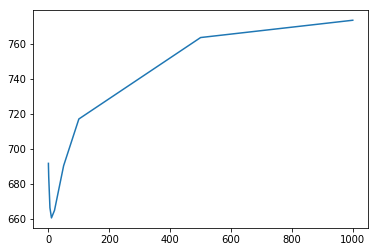

q6 best RMSE = 660.5612900111673 
first 20 pred y = [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903] 
first 20 actual y = [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


In [17]:
# Question 6
q6_rmse = []
for i in alpha_list:
    q6_reg = linear_model.Ridge(alpha=i).fit(x_train_keep, y_train_keep)
    q6_pred = q6_reg.predict(x_test_keep)
    q6_rmse.append(RMSE(q6_pred, y_test_keep))

plt.figure()
plt.plot(alpha_list, q6_rmse)
plt.show()

q6_best_alpha = alpha_list[q6_rmse.index(min(q6_rmse))]
q6_reg_20 = linear_model.Ridge(alpha=q6_best_alpha).fit(x_train_keep, y_train_keep)
q6_pred_20 = q6_reg_20.predict(x_test_keep[:20])
print('q6 best RMSE =', min(q6_rmse), '\nfirst 20 pred y =', q6_pred_20, '\nfirst 20 actual y =', np.asarray(y_test_keep[:20]).T[0])

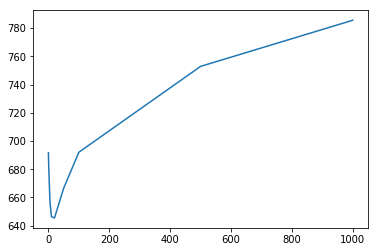

q7 best RMSE = 645.4765099785807 
first 20 pred y = [1142.26501158  254.19831891 1833.98249063   15.81971201  599.78479799
  635.93623751  427.81103264  603.68223326  514.51294568  580.01818044
  544.3617494   477.1760562   801.52925185  557.42714594  396.31892351
  615.19547634 1474.69200428 2504.89402103 3524.44807834 3437.93251151] 
first 20 actual y = [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


In [18]:
# Question 7
q7_rmse = []
for i in alpha_list:
    q7_reg = linear_model.Ridge(alpha=i).fit(x_train_std_cont, y_train_demean)
    q7_pred = q7_reg.predict(x_test_std_cont) + y_train_keep.mean()
    q7_rmse.append(RMSE(q7_pred, y_test_keep))

plt.figure()
plt.plot(alpha_list, q7_rmse)
plt.show()

q7_best_alpha = alpha_list[q7_rmse.index(min(q7_rmse))]
q7_reg_20 = linear_model.Ridge(alpha=q7_best_alpha).fit(x_train_std_cont, y_train_demean)
q7_pred_20 = q7_reg_20.predict(x_test_std_cont[:20]) + y_train_keep.mean()
print('q7 best RMSE =', min(q7_rmse), '\nfirst 20 pred y =', q7_pred_20, '\nfirst 20 actual y =', np.asarray(y_test_keep[:20]).T[0])

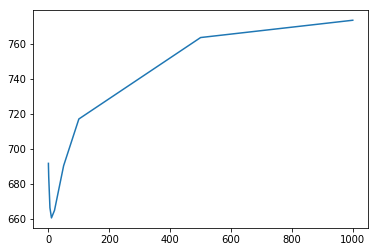

q8 best RMSE = 660.5612900111672 
first 20 pred y = [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903] 
first 20 actual y = [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


In [19]:
# Question 8
q8_rmse = []
for i in alpha_list:
    q8_reg = linear_model.Ridge(alpha = i).fit(x_train_keep, y_train_demean)
    q8_pred = q8_reg.predict(x_test_keep) + y_train_keep.mean()
    q8_rmse.append(RMSE(q8_pred, y_test_keep))

plt.figure()
plt.plot(alpha_list, q8_rmse)
plt.show()

q8_best_alpha = alpha_list[q8_rmse.index(min(q8_rmse))]
q8_reg_20 = linear_model.Ridge(alpha=q8_best_alpha).fit(x_train_keep, y_train_demean)
q8_pred_20 = q8_reg_20.predict(x_test_keep[:20]) + y_train_keep.mean()
print('q8 best RMSE =', min(q8_rmse), '\nfirst 20 pred y =', q8_pred_20, '\nfirst 20 actual y =', np.asarray(y_test_keep[:20]).T[0])

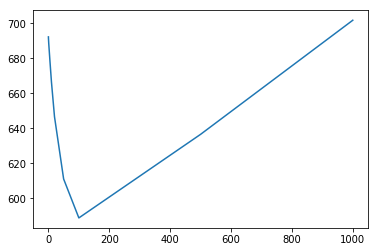

q9 best RMSE = 588.7417838501877 
first 20 pred y = [1040.62769709  278.52100523 1997.25699171  -20.78951638  554.43996287
  602.97754449  337.64159001  599.48067464  470.37675304  500.9895794
  511.30255579  387.98007641  700.27383291  532.30751717  255.46461175
  653.43988631 1727.73760713 2774.34393982 3173.47852884 3140.20312262] 
first 20 actual y = [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


In [20]:
# Question 9
q9_rmse = []
for i in alpha_list:
    q9_reg = linear_model.Ridge(alpha = i).fit(x_train_std_all, y_train_demean)
    q9_pred = q9_reg.predict(x_test_std_all) + y_train_keep.mean()
    q9_rmse.append(RMSE(q9_pred, y_test_keep))

plt.figure()
plt.plot(alpha_list, q9_rmse)
plt.show()

q9_best_alpha = alpha_list[q9_rmse.index(min(q9_rmse))]
q9_reg_20 = linear_model.Ridge(alpha=q9_best_alpha).fit(x_train_std_all, y_train_demean)
q9_pred_20 = q9_reg_20.predict(x_test_std_all[:20]) + y_train_keep.mean()
print('q9 best RMSE =', min(q9_rmse), '\nfirst 20 pred y =', q9_pred_20, '\nfirst 20 actual y =', np.asarray(y_test_keep[:20]).T[0])

/Users/ryanhuang/.conda/envs/untitled/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ryanhuang/.conda/envs/untitled/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


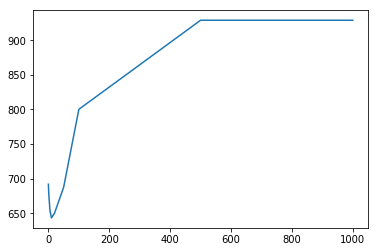

q10 best RMSE = 643.3718982256364 
first 20 pred y = [1241.6223164   287.92223059 2119.86843555  -16.21948483  449.10927151
  711.12849285  398.00900096  460.16057186  645.42321369  591.46235164
  429.98632846  461.47834501  899.78371266  571.83189341  352.89540448
  548.09013323 1741.03965072 2712.11079574 3681.3587799  3645.02255397] 
first 20 actual y = [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


In [21]:
# Question 10
q10_rmse = []
for i in alpha_list:
    q10_reg = linear_model.Lasso(alpha = i).fit(x_train_std_cont, y_train_demean)
    q10_pred = q10_reg.predict(x_test_std_cont) + y_train_keep.mean()
    q10_rmse.append(RMSE(q10_pred, y_test_keep))

plt.figure()
plt.plot(alpha_list, q10_rmse)
plt.show()

q10_best_alpha = alpha_list[q10_rmse.index(min(q10_rmse))]
q10_reg_20 = linear_model.Lasso(alpha=q10_best_alpha).fit(x_train_std_cont, y_train_demean)
q10_pred_20 = q10_reg_20.predict(x_test_std_cont[:20]) + y_train_keep.mean()
print('q10 best RMSE =', min(q10_rmse), '\nfirst 20 pred y =', q10_pred_20, '\nfirst 20 actual y =', np.asarray(y_test_keep[:20]).T[0])

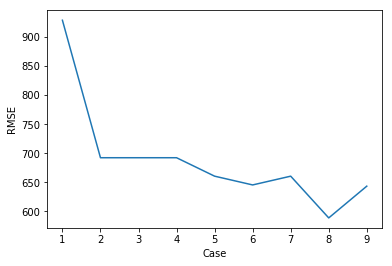

In [22]:
# Question 11: Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?
case_list = list(range(1,10))
rmse_list = [q2_rmse, q3_rmse, q4_rmse, q5_rmse, min(q6_rmse), min(q7_rmse), min(q8_rmse), min(q9_rmse), min(q10_rmse)]
plt.figure()
plt.plot(case_list, rmse_list)
plt.ylabel('RMSE')
plt.xlabel('Case')
plt.show()

In [23]:
'''For the 3 cases running OLS regression, there is no difference on the RMSE values, suggesting feature preprocessing doesn't work in OLS.'''
'''For the 4 cases running Ridge regression, RMSEs are quite different. When we keep all x and de-mean y, it's the same as keeping y'''
'''Also, when comparing 3B and 3D, we can see that standardizing the binary Xs improves the RMSE significantly'''
'''To sum up, it seems that standardizing all features and de-mean y is the best practice on data preprocessing.'''

'To sum up, it seems that standardizing all features and de-mean y is the best practice on data preprocessing.'